# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

In [279]:
# import las librerias que me permiten trabajar con sympy y las operaciones
import sympy as sym
from sympy import *

In [280]:
# Defino funciones y variables como simbolos
x= sym.symbols('x')
y = Function('y')
z = Function('z')
w = Function('w')
ecuacion1 = Eq(y(x), cos(x))
ecuacion2 = Eq(z(x), sin(x))
ecuacion3 = Eq(w(x), 1/ (sin(x) + cos(2*x)) )
ecuacion1

Eq(y(x), cos(x))

In [281]:
ecuacion2

Eq(z(x), sin(x))

In [282]:
ecuacion3

Eq(w(x), 1/(sin(x) + cos(2*x)))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [298]:
# defino funcion g y aplico derivada de g con respecto a x
g = Function('g')
ecuacion4 = Eq(g(x),y(x)*z(x))
derg = Eq(diff(g(x),x),diff(y(x)*z(x),x))
derg

Eq(Derivative(g(x), x), y(x)*Derivative(z(x), x) + z(x)*Derivative(y(x), x))

(c) Grafica $w(x)$ en el rango $[0,1]$

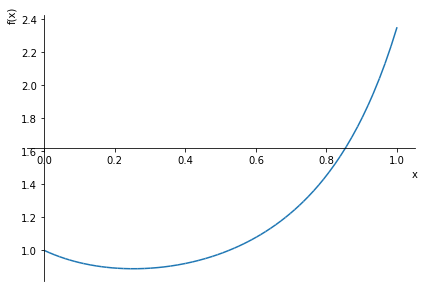

In [306]:
plot(1/ (sin(x) + cos(2*x)),(x,0,1))

In [305]:
solve(1/ (sin(x) + cos(2*x)),(x,0,1))

[]

In [300]:
inter = sym.Interval(0,1).is_closed

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

In [301]:
integrate(sin(x)*cos(x),x) # usamos la integracion en symmpy

sin(x)**2/2

In [302]:
integrate(sin(x) * cos(x), (x,0,1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [60]:
limit(cos(x),x,0)

1

In [61]:
limit(sin(x),x,0)

0

In [62]:
limit(1/ (sin(x) + cos(2*x)),x,0)

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [64]:
cos(x).series(x,3)

cos(3) - (x - 3)*sin(3) - (x - 3)**2*cos(3)/2 + (x - 3)**3*sin(3)/6 + (x - 3)**4*cos(3)/24 - (x - 3)**5*sin(3)/120 + O((x - 3)**6, (x, 3))

In [65]:
sin(x).series(x,3)

sin(3) + (x - 3)*cos(3) - (x - 3)**2*sin(3)/2 - (x - 3)**3*cos(3)/6 + (x - 3)**4*sin(3)/24 + (x - 3)**5*cos(3)/120 + O((x - 3)**6, (x, 3))

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [223]:
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

In [255]:
def atractor(estado,time):
    dx = -estado[1]-estado[2]
    dy = estado[0] + estado[1]*0.13
    dz = 0.2 + estado[2]*(estado[0]-6.5)
    return np.array([dx,dy,dz])

In [225]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [226]:
def euler(y, t, dt, derivadas):
    y_next = y + derivadas(y, t)*dt
    return y_next

In [227]:
N = 100 # número de pasos

x0 = 0.0  # posición inicial x

y0 = 0.0  # posición inicial y

z0 = 0.0  # posición inicial z

tau = 100.0 # tiempo de la simulación
 
dt = tau/(N-1)  # tamaño del paso

In [228]:
dt

0.1001001001001001

In [229]:
v = np.zeros([N,3])

v[0,0] = x0
v[0,1] = y0
v[0,2] = z0

In [230]:
time = np.linspace(0, tau, N)

In [231]:
v

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [232]:
for j in range(N-1):
    v[j+1] = RK2(v[j], time[j], dt, atractor)

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

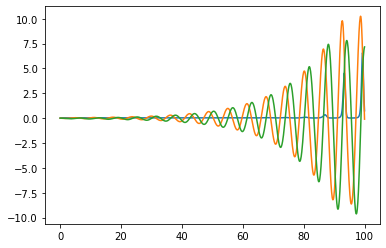

In [234]:
xdata = [v[j,0] for j in range(N)]
ydata = [v[j,1] for j in range(N)]
zdata = [v[j,2] for j in range(N)]

plt.plot(time, zdata, label="pos")
plt.plot(time, xdata, label="vel")
plt.plot(time, ydata, label="vel2")
#plt.xlabel("tiempo")
#plt.ylabel("posicion, velocidad")
#plt.legend(loc="best")

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

-0.0029111134638135448

In [266]:
type(xdata)

list

In [269]:
zdos = (xdata, ydata)

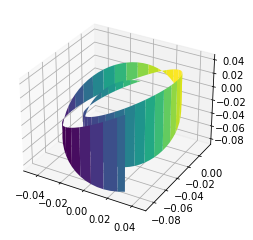

In [271]:
# Graficamos en tres dimensiones 
xdata = [v[j,0] for j in range(N)]
ydata = [v[j,1] for j in range(N)]
zdata = [v[j,2] for j in range(N)]
zdos = (xdata, ydata)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection="3d")
ax.plot_surface(np.array(xdata), np.array(ydata), np.array(zdos),cmap="viridis")
#ax.set_xlabel("Beta0")
#ax.set_ylabel("Beta1")
#ax.set_zlabel("Función de costo(J)")